In [1]:
import numpy as np
import pandas as pd
# 读入数据并显示前面几行的内容，确保我们已经成功的读入数据到代码当中
df_ads=pd.read_csv("./advertising.csv")
df_ads.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


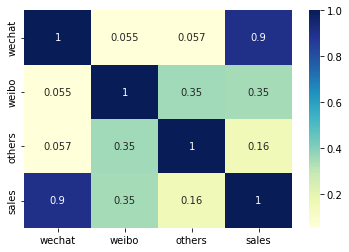

In [2]:
# 导入数据可视化所需要的库
# matplotlib是python的画图工具库
import matplotlib.pyplot as plt
# seaborn库是统计学数据可视化工具
import seaborn as sns
# 对所有的标签和特征两两成对显示其相关性的热力图
sns.heatmap(df_ads.corr(),cmap="YlGnBu",annot=True)
plt.show()

运行了上面的代码之后，我们把三个特征和一个标签总共4组变量之间的相关性系数用矩阵的形式显示出来，相关性越高，
对应的颜色也就越深。这里的相关性分析结果很明显地向我们显示了----将有限的金额投放到微信公众号了面做广告是最为合理的选择。

接着，我们来作一个数据的散点图
通过下面的代码来两两一组显示商品销售额和各种广告投放金额之间的对应关系。
将重点聚焦。散点图是回归分析中，数据点在直角坐标系平面上的分布率。
它是一个相当有效的数据可视化工具。

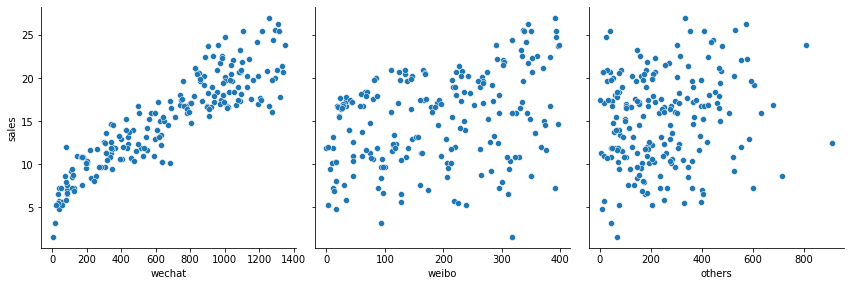

In [3]:
# 显示销量和各种广告投放量的散点图
sns.pairplot(df_ads,x_vars=['wechat','weibo','others'],y_vars='sales',height=4,aspect=1,kind='scatter')
plt.show()

运行代码之后，我们可以在散点图上看出，销售额和广告投放两个数据的相关性上，微信的相关度最高
（随着广告投放金额的变化而变化趋势最明显）。

## 数据集的清洗和规范化 ##
那么通过这样的观察，我们可以知道在本案例当中的三个特性里，为了简化模型，我们可以暂时忽略另外的两个广告投放渠道特征。
只留下微信广告投放金额数据。这样一来，就把多变量的回归分析简化成了单变量的回归分析。

接下来，我们通过代码把df_ads中的微信公众号广告投金额字段读入一个numpy数组x当中。
也就是清洗了其他两个特征字段，并把标签（销售额）读入带数组y中：

In [4]:
X = np.array(df_ads.wechat) # 构建特征集，只有微信广告一个特征
y = np.array(df_ads.sales) # 构建标签。。。。。。
print("张量X的阶：",X.ndim)
print("张量X的形状：",X.shape)
print("张量X的内容：",X)

张量X的阶： 1
张量X的形状： (200,)
张量X的内容： [ 304.4 1011.9 1091.1   85.5 1047.   940.9 1277.2   38.2  342.6  347.6
  980.1   39.1   39.6  889.1  633.8  527.8  203.4  499.6  633.4  437.7
  334.  1132.   841.3  435.4  627.4  599.2  321.2  571.9  758.9  799.4
  314.   108.3  339.9  619.7  227.5  347.2  774.4 1003.3   60.1   88.3
 1280.4  743.9  805.4  905.    76.9 1088.8  670.2  513.7 1067.    89.2
  130.1  113.8  195.7 1000.1  283.5 1245.3  681.1  341.7  743.   976.9
 1308.6  953.7 1196.2  488.7 1027.4  830.8  984.6  143.3 1092.5  993.7
 1290.4  638.4  355.8  854.5    3.2  615.2   53.2  401.8 1348.6   78.3
 1188.9 1206.7  899.1  364.9  854.9 1099.7  909.1 1293.6  311.2  411.3
  881.3 1091.5   18.7  921.4 1214.4 1038.8  427.2  116.5  879.1  971.
  899.1  114.2   78.3   59.6  748.5  681.6  261.6 1083.8 1322.7  753.5
 1259.9 1080.2   33.2  909.1 1092.5 1208.5  766.2  467.3  611.1  202.5
   24.6  442.3 1301.3  314.9  634.7  408.1  560.1  503.7 1154.8 1130.2
  932.8  958.7 1044.2 1274.9  550.6 1259.   19

输出的结果如上，我们可以看到，X特征集的阶是1阶，也就是1D张量。
这个张量当中总共包含了200个样本。（200条内容）
这些都是我们每周的微信广告投放的金额数据

目前，X数组当中只有一个特征，张量的阶为1，那么这个1D的特征张量，是否是机器学习算法可以接受的格式呢？

我们之前说过，对于回归问题的数值类型数据集，机器学习模型所读入的规范格式应给是2D张量，也就是矩阵。
特的形状应该是（样本数，标签数）。其中的行是数据，而其中的列是特征。我们可以把它想象成excel表格的格式。
那么就现在的特征张量X而言，我们要把它的形状从（200，）变成（200，1），然后在进行机器学习。

In [5]:
# X = X.reshape((len(X),1)) # 通过reshape函数把向量转换为矩阵，len函数返回样本个数
# y = y.reshape((len(y),1)) # 通过reshape函数把向量转换为矩阵，len函数返回样本个数
X = X.reshape(-1,1) # 通过reshape函数把向量转换为矩阵，len函数返回样本个数
y = y.reshape(-1,1) # 通过reshape函数把向量转换为矩阵，len函数返回样本个数
print("张量X的阶：",X.ndim)
print("张量X的形状：",X.shape)
# print("张量X的内容：",X)

张量X的阶： 2
张量X的形状： (200, 1)


现在我们的数据格式从（200，）变成了（200，1）。尽管它还是200个数字，但是数据的结构从一个1D数组变成了有行有列的矩阵。再次
强调一下，对于常见的连续性数值数据（也叫做向量数据集）。输入特征集是2D矩，包含了两个轴：
    第一个轴是样本轴(numpy里面的索引是0)
    第二个轴式特征轴(numpy里面的索引是1)

对于标签张量y，第二个轴的维度总是1，因为标签值只有一个。这里也可以把它转换为一个2阶张量

## 拆分数据集为训练数据集和测试数据集 ##
在开始建模之前，我们还需要把数据集拆分为两个部分：训练集和测试集
在普通的机器学习项目当中，至少要包含这两个数据集，一个用于训练机器，并确定模型。
一个用来测试模型的准确性

除了上面两种之外,我, 还需要一个验证集。
用来在最终测试之前增加验证环节。目前来说，这个环节比较简单，而且数据集也比较少。我们简化了流程，合并了验证和测试的环节成一个。

等下划分的这两个数据集部分，需要随机分配，两者之间不可以出现明显的差异性。
所以，在拆分之前，要注意数据是否已经被排序或者分类，如果是，还要将他们打乱。

接下来，我们使用下面的代码将数据集以80%（训练集）和20%（测试集）的比例进行拆分

In [6]:
# 将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sklearn库当中的train_test_split函数，是机器学习当中用来拆分数据的常用工具
这个方法当中参数:
    test_size=0.2表示将20%的样本拆分出来作为测试数据
如果我们用print()方法输出拆分后的新的数据集(比如X_train，X_test),你会发现
这个工具已经为数据集进行了乱序操作。这是因为其中的shuffle参数默认值之True导致的
    random_state参数，则用于数据集拆分过程当中的随机化设定。如果我们指定了一个整数
那么这个数叫做随机化种子，每次设定固定的种子能够保证随机工作得到同样的训练数据集和测试机。
不会在下一次随机的时候改变随机结果。（简单的说用于固定随机结果）

## 数据的归一化 ##
如果我们还记得之前介绍的时候说过几种特征的缩放方法,其中包括了标准化、数据的压缩（也叫做归一化），以及规范化等等。特征
缩放对于机器学习来说是非常重要的，它可以让机器在读取数据的时候感觉更“舒服”一些，那么在训练起来也就更顺利效率更高一些。

这里我们对数据进行归一化操作，归一化是按照比例的线性缩放，数据归一化之后，数据的分布不变,但是都会落入一个小的特定的区间，比如0-1或者1-1这样的区间，我们可以通过sklearn当中的prepricessing数据预处理工具中的MinMaxScaler来实现数据的归一化操作。不过我们可以自己定义一个归一化函数。

In [7]:
# 这就是：X'(X'=(X-min(X)/(max(X)-min(X)))
def scaler(train,test): # 定义归一化函数，进行数据压缩
    min = train.min(axis=0) # 训练集最小值
    max = train.max(axis=0) # 训练集最大值
    gap = max - min # 最大值和最小值的差
    train -= min # 所有数据减最小值
    train /= gap # 所有数据除以大小值差
    test -= min # 把训练集最小值应用于测试集
    test /= gap # 把训练集大小值差应用于测试集
    return train,test # 返回压缩后的数据

In [8]:
X_train,X_test = scaler(X_train,X_test) # 对特征归一化
y_train,y_test = scaler(y_train,y_test) # 对标签页归一化

上面的代码当中,特别需要我们注意的是归一化过程当中的最大值(max),最小值(min),以最大值和最小值之间的差(gap),全都来自于训练集.
不能使用测试集中的数据信息进行特征缩放当中步骤的任何值的计算。
举个例子，如果训练集中的广告投放金额最大值是350。测试集中的广告投放金额最大值是380。
那么尽管380大于350，但是归一化函数还是要以350作为最大值，来处理训练集和测试集的所有值。
为啥呢？为什么非要这么干呢？因为，在建立机器学习模型的时候，理论上测试集还没有出现。
所以这个步骤一定要在拆分数据集之后才能进行。有一些人在拆分之前就先对整个数据集进行了特征
的缩放，然后拆分数据集。这种做法是不靠谱的，他会把测试集中的部分信息泄露到机器学习的建模
过程当中。

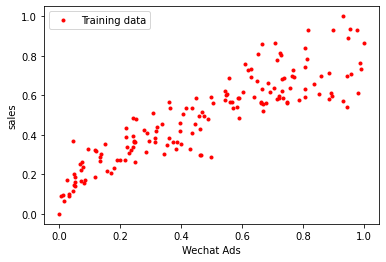

In [9]:
# 这里的代码生成一个数据压缩处理之后的训练数据散点图。
# 可以看出他的图形和之前的基本上完全一致。只是数据已经被
# 限制在了一个较小的区间范围当中
# lineX = np.linspace(X_norm.min(),X_norm.max(),100)
# 用之前已经导入的matplotlib.pyplot中的plot方法显示散点图
plt.plot(X_train,y_train,'r.',label='Training data')
plt.xlabel('Wechat Ads')# x轴Label
plt.ylabel('sales') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果

## 选择机器模型 ##
机器学习当中模型的确立过程有两个比较主要的环节
1. 确定选用什么类型的模型
2. 确定模型的具体参数
我们接下来先去针对第一个问题来解决它

对于这个案例，使用什么类型的模型其实从一开始就已经跟大家说了。
虽然上面展示的散点图当中函数直线并没有穿过每一个点，但是已经能够反应出特征了--也就是微信公众号广告投放金额和商品销售额
之间的关系。拟合程度还是不错的。
这个散点图呈现出来的状态我们可以看成是一元线性函数
y=ax+b
其中，刚才我们画图中看到的a也就是斜率，它表示了我们图形的陡峭程度。b则是截距
它表示了与y轴相交的位置
在机器学习当中，会稍微的修改一下参数的代号，会把模型表述成y=wx+b
这里把a邪路改成了w，因为在机器学习当中这个参数表示的是weight权重。
在多元变量的情况下，一个特征对应的w参数值越大，就表示它的权重越大。
而参数b，在机器学习当中称之为偏置。
在后续的机器学习当中，这个简单的函数将反复作为一个重要的基本运算单元出现

## 假设函数 ##
确定以线性函数作为机器学习的模型之后，我们接着介绍一下假设函数的概念。
首先来看看一个和上面线性函数稍有差别的方程式。
y'=wx+b
或
h(x)=wx+b

可以注意以下两点内容：
    y'指的是所预测出的标签，你可以读成y撇儿，也可以读成y帽儿(y-hat)
    h(x)就是机器学习所得到的函数模型。它能够根据输入的特征进行标签的预测。
    我们把上面的这个方程式称作假设函数。

如果我们对这个函数存在疑惑，比如......
只不过原本的y变成了y'或者h(x)而已。等号的右侧并没有任何变化。
它确实是线性函数，不过在机器学习的过程是一个不断假设，不断探寻以及不断优化的过程。
在找到最佳的f(x)函数之前，现有的函数模型不一定是很准确的，他只是很多可能的模型中的一种。所以我们要强调，假设函数得出
的结果是y'而不是y本身。
所以假设函数有的时候也会被叫做预测函数。
在机器学习当中看到的h(x),f(x)或者还有p(x)，基本上他们所做的都是一回事儿。

所以，机器学习的具体目标就是确定假设函数h(x)
    确定b，也就是y轴的截距，这里称为偏置，有一些机器学习的文档里面，他被称为$w_0$。
    确定w，也就是斜率，这里称为特征x的权重，有些机器学习文档当中会将它叫做$w_1$。
一旦我们找到了参数w和b的值，整个函数模型也就被确定了。那么这些参数w和b的具体值怎么得到呢？

## 损失（误差）函数——L(w,b) ##
在继续寻找最优的参数之前，我们需要先介绍损失和损失函数。
如果现在已经有了一个假设函数，就可以进行标签的预测了。那么怎么样才能量化这个模型是不是
足够好呢？比如，一个模型是3x+5，另一个是100x+1，怎么评估哪个更好呢？
这里我们就需要引入损失（loss）这个概念。
损失，就是对糟糕的预测的惩罚。损失也就是误差，也可以称为成本（cost）或者代价。
虽然名字比较多，但是它们都是一个意思。也就是当前预测值和真实值之间的差距的体现。
它是一个数值，表示对于单个样本而言模型预测的准确程度。如果说模型的预测完全准确，
则损失为0。如果不准确，就是有损失。在机器学习当中，我们追求的是相对较小的损失值。
不过，模型好与不好不只是看单个样本，而是要针对所有数据样本找到一组平均损失“较小”的函数
模型。样本损失的大小，从几何意义上基本可以理解为y和y'之间的几何举例。
平均举例越大，说明误差值越大，模型也就越离谱。

在每一个机器学习项目当中平均损失值的计算是必须的环节。

说到这里，要强调一下，损失函数L是参数w和b的函数，不是针对x的函数。我们可能有些同学会有
一些比较固定的思维定势。总会觉得函数一定表示的是x和y之间的关系。现在我们需要暂时忘掉它。
将我们的视线聚焦在参数上。对于一个给定的数据来说，所......

计算数据集的平均损失值对我们来说非常重要。简而言之就是：如果平均损失值小，参数就好；
如果平均损失值大，那么模型或者参数还要继续调整才行。
计算当前假设函数所造成的损失的过程，就是前面我们提到过的模型内部参数的评估的过程。
机器学习中的损失函数很多，主要包括了如下的几种：
## 用于回归的损失函数 ##
    均方误差值函数，也可以叫平方损失值或者L2损失值。
    平均绝对误差值函数，也可以叫做L1函数。
    平均偏差误差函数。
## 用于分类的损失函数 ##
    交叉熵损失值函数
    多分类SVM损失函数
一般来说，选择最常用的损失函数就可以达到评估参数的目的。
下面我们会给出线性回归模型的常用损失函数---均方误差函数的实现过程！
    首先，对于每一个样本，其预测值和真实值的差异(y-y')，而y'=wx+b.
    所以损失值与参数w和b是有关的。
    其次，如果将损失值(y-y')夸张一下，进行平方（平方之后原来有正有负的数值就都变成了正数）。
我们把这个值叫做单个样本的平方损失。
    然后，需要把所有的样本的平方损失值相加。
    最后，根据样本的数量求平均值。

In [10]:
# 定义线性回归的损失函数
def cost_function(X, y, w, b): # 手工定义一个MSE均方误差函数
    y_hat = w*X + b # 这是假设函数,其中已经应用了Python的广播功能
    loss = y_hat-y # 求出每一个y’和训练集中真实的y之间的差异 
    cost = np.sum(loss**2)/len(X) # 这是均方误差函数的代码实现
    return cost # 返回当前模型的均方误差值

In [11]:
print ("当权重5，偏置3时，损失为：", cost_function(X_train, y_train, w=5, b=3))
print ("当权重100，偏置1时，损失为：", cost_function(X_train, y_train, w=100, b=1))

当权重5，偏置3时，损失为： 25.592781941560116
当权重100，偏置1时，损失为： 3155.918523006111


## 通过梯度下降来讲找到最佳的参数 ##
现在,我们的数据集已经读入到张量当中,也选定了以线性回归作为机器学习的模型.
并且已经准备好了损失值函数MSE,接下俩我们要正式开始训练激起了!

## 训练机器要有一个正确的方向 ##
所谓训练机器，也可以称作拟合的过程。也就是确定模型内部参数的过程。
具体到线性模型，也就是确定y'=wx+b函数中的w和b。那么怎么才能知道他们的最佳值是多少呢？
刚才我们......
但是我们说机器是没有直觉的,只能通过算法减少损失。一个最简单最无脑的算法是让机器随机
生成比如一万个w和b的组合。然后挨个去计算他们的损失值。最后确定其中损失值比较小的那组
参数。并且宣布，这是一万个组合当中最好的模型。这也是一种算法。

计算参数更新的过程也是一个迭代的过程，也是机器学习的过程
在机器学习的过程当中，我们通过不停地给它更新参数，获得不同的参数对应计算出来的误差值

## 凸函数确保有最小损失点 ##
目前我们的前进的方向是对的，但是还不够，还有另一个关键点，就是我们需要知道什么时候停下来。

前面我们已经强调过，函数方程式当中的x，y都可以视为常量。L就只随着w和b而变化。
函数是连续的平滑直线，其中每一个微小的w和b的改变都会带来L的微小改变。
而且这个函数很显然是一个二次函数，为了简化描述，方便绘图绘图的话。先忽略参数b，对于给定
的数据集来说，平均损失L和w的对应关系如图所示：
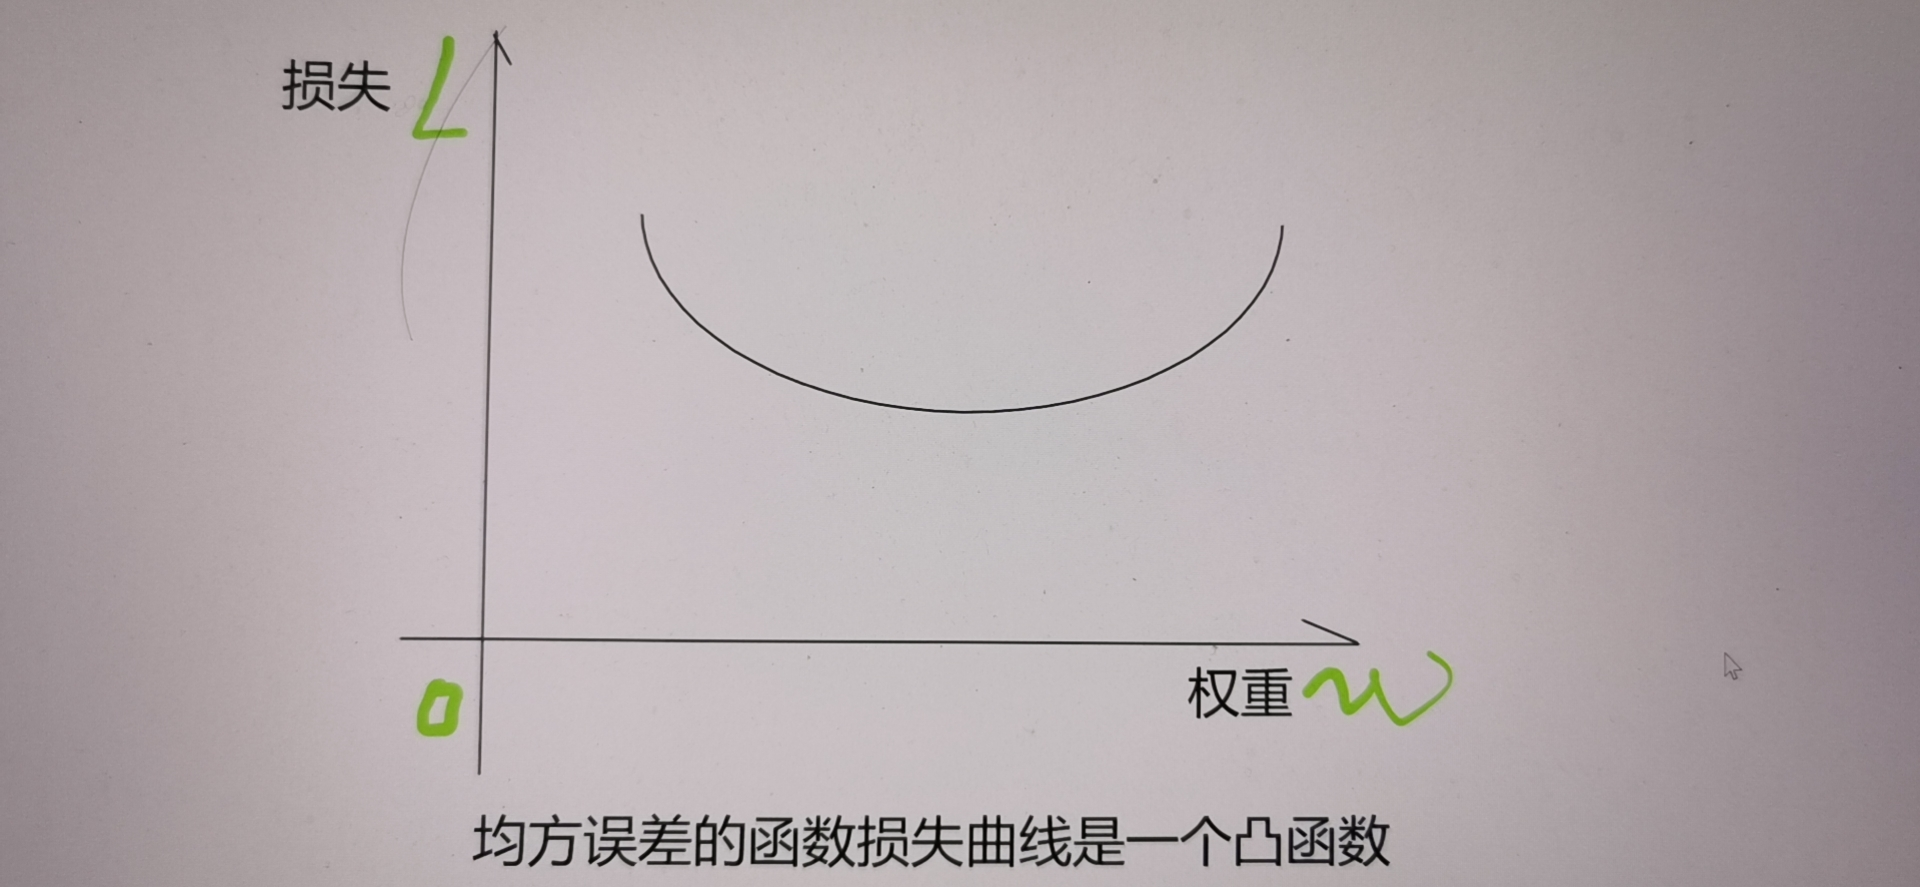
我们将这个函数图像称为损失函数，该图像看上去就是一个凸函数，有着比较平滑的图像结构。
在其中一定会有一个全局最低点。我们就要通过梯度下降来找到这个全局最低点。

## 实现梯度下降 ##
梯度下降的过程，就是一个在程序当中一点儿一点儿变化的参数w和b，使L，也就是损失值逐渐地趋近于最低点。
也称为机器学习当中的最优解。

实际上想要求得最低点，重要的武器是导数。导数它描述了函数在某个点附近的变化。这个就是进一步猜测更好
的权重的时候所需的全部内容。

在程序当中用梯度下降法通过求导来让计算机计算出损失曲线在起点处的梯度。
这个时候，梯度就是损失曲线中导数的矢量，它可以让我们了解哪个方向举例目标更近一些。
如果说求导之后梯度是正值，就说明L在随着w的增大而增大，我们应该减小w，用来得到更小的损失。
反之，负数说明L随着w减小而减小，应该增大w，用来得到更大的损失。

也就是说，通过对损失的曲线求导之后，就得到了梯度。梯度有两个特征。
    1. 方向（就是梯度的正或负）
    2. 大小（就是切线的斜率）

这两个重要的特征，尤其是方向特征，梯度始终会指向损失函数当中增长最迅速的方向。梯度下降法，会沿着负梯度的方向走一步，以降低损失。

通过梯度通过梯度下降法，如果初始估计的w值落在最优值得左侧，那么梯度下降会将w增大，反之，也是为了趋近最低值

y_hat  = w*X + b # 这个是向量化运行实现的假设函数
loss = y_hat-y # 这是中间过程,求得的是假设函数预测的y和真正的y值之间的差值
derivative_weight = X.T.dot(loss)/len(X)*2 # 对权重求导，len(X)就是数据集样本数N
derivative_bias = sum(loss)*1/len(X)*2 # 对偏置求导，len(X)就是数据集样本数N

## 学习速率的问题 ##
最关键的问题，我们刚刚通过求导来解决了，知道了权重w应该往那个方向走。
下一步就是解决下降速度的问题。
这个速度问题，在机器学习当中被称作学习速率。
学习速率也可以写作α——alpha。
学习速率乘以损失曲线求导之后的微分值，就是一次梯度变化的步长值。
它在控制着我们当前梯度下降的节奏是快是慢。w会在每次迭代的过程当中被更新。
python代码如下：
weight=weight-alpha*derivative_weight # 结合下降速率alpha更新权重
bias=bias-alpha*derivative_bias # 结合下降速率alpha更新偏置

如果我们所选择的学习速率过小，机器就会花费很长的时间。需要迭代很多次才能达到损失值的最低点。

在机器学习刚刚开始的时候学习速率可以设置的大一些，这样能快速靠经最佳权重的位置。


In [12]:
# 线性回归的梯度下降实现
def gradient_descent(X, y, w, b, lr, iter): # 定义一个实现梯度下降的函数
    l_history = np.zeros(iterations) # 初始化记录梯度下降过程中损失的数组
    w_history = np.zeros(iterations) # 初始化记录梯度下降过程中权重的数组
    b_history = np.zeros(iterations) # 初始化记录梯度下降过程中偏置的数组                      
    for iter in range(iterations): # 进行梯度下降的迭代，就是下多少级台阶
        y_hat  = w*X + b # 这个是向量化运行实现的假设函数
        loss = y_hat-y # 这是中间过程,求得的是假设函数预测的y和真正的y值之间的差值
        derivative_weight = X.T.dot(loss)/len(X)*2 # 对权重求导，len(X)就是数据集样本数N
        derivative_bias = sum(loss)*1/len(X)*2 # 对偏置求导，len(X)就是数据集样本数N
        w = w - lr*derivative_weight # 结合下降速率alpha更新权重
        b = b - lr*derivative_bias # 结合下降速率alpha更新偏置
        l_history[iter] = cost_function(X, y, w,b) # 梯度下降过程中损失的历史 
        w_history[iter] = w # 梯度下降过程中权重的历史
        b_history[iter] = b # 梯度下降过程中偏置的历史
    return l_history, w_history, b_history # 返回梯度下降过程数据

## 权重和偏置的初始值 ##
在线性回归当中，权重和偏置的初始值的选择可以是随机的。
这个对结果的影响不大。因为我们知道无论你怎么选择，梯度下降总会带着机器走到最优结果
差别只在于你走到最低点所用的步数是多还是少。

In [13]:
# 定义线性回归的预测函数
def predict(weight,bias,X): # 定义预测函数
    y_hat = weight*X + bias # 这是假设函数,其中已经应用了Python的广播功能
    return y_hat # 返回预测分类的结果

## 实现一元线性回归模型并且调用调式超参数 ##

In [14]:
# 定义线性回归模型 - 核心就是调用梯度下降
def linear_regression(X, y, weight, bias, alpha, iterations): 
    loss_history, weight_history, bias_history = gradient_descent(X, y, 
                                                                  weight, bias, 
                                                                  alpha, iterations)
    print("训练最终损失:", loss_history[-1]) # 打印最终损失
    y_pred = predict(weight_history[-1],bias_history[-1],X) # 预测
    traning_acc = 100 - np.mean(np.abs(y_pred - y))*100 # 计算准确率
    print("线性回归训练准确率: {:.2f}%".format(traning_acc))  # 打印准确率
    return loss_history, weight_history, bias_history # 返回训练历史记录

In [15]:
# 首先确定参数的初始值
iterations = 500; # 迭代500次
alpha = 0.5; #学习速率设为1,0.5和0.01，分别试一下
weight = -5 # 权重
bias = 3 # 偏置
# 计算一下初始权重和偏置值所带来的损失
print ('当前损失：',cost_function(X_train, y_train, weight, bias))

当前损失： 2.687591069813268


这里通过下面的代码可以画出当前回归函数的图像

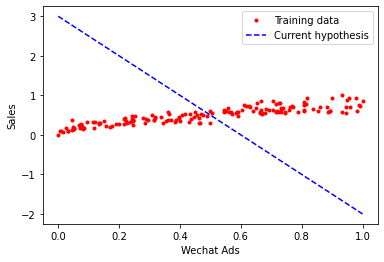

In [16]:
# 绘制当前的函数模型
plt.plot(X_train, y_train,'r.', label='Training data') # 显示训练集散点图
line_X = np.linspace(X_train.min(), X_train.max(), 500) # X值域
line_y = [weight*xx + bias for xx in line_X] # 假设函数y_hat
plt.plot(line_X,line_y,'b--', label='Current hypothesis' ) # 显示当前拟合函数
plt.xlabel('Wechat Ads') # x轴Label
plt.ylabel('Sales') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图

In [17]:
# 用线性回归模型训练机器，拟合函数
loss_history, weight_history, bias_history = \
   linear_regression(X_train,y_train,weight,bias,alpha,iterations)

训练最终损失: 0.009312952135151986
线性回归训练准确率: 92.28%


## 进行梯度下降 ##
下面的代码就是基于之前求导的平均损失值比较大的初始参数值，进行梯度下降，实际上就是从这里开始进行了
机器学习的训练，拟合函数。调用了之前已经定义好的梯度下降的函数，并且设定了迭代500次。
在机器训练的过程当中，我们已经通过变量loss_history来记录了每次迭代的损失值。
那么下面的代码当中把损失值大小和迭代的次数的关系通过函数图像能够显示出来。
看一看损失是不是如同我们之前预期的一样。看看是否能够随着梯度下降逐渐减小与最佳状态的差距。

In [18]:
# 根据初始参数值，进行梯度下降，也就是开始训练机器，拟合函数
loss_history, weight_history, bias_history = \
   gradient_descent(X_train, y_train, weight, bias, alpha, iterations)

## 绘制当前线性函数的图像 ##
注意一点，这个图像和前面一步绘制的图像都不靠谱 为了和之后的结果进行比较 看一看梯度下降带来的影响

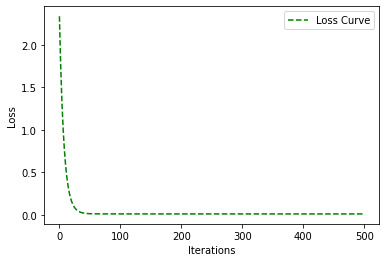

In [19]:
plt.plot(loss_history,'g--',label='Loss Curve')
plt.xlabel('Iterations') # x轴Label
plt.ylabel('Loss') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示损失曲线

之前的图像当中并没有得到我们所期望的结果，为啥呢？
其实，根据之前说过的内容，我们应该可以猜的出来一个大概的原因。
这个数据集比较简单，没有什么潜在的数据问题。而且模型比较简单，如果损失函数，梯度下降的代码
和求导过程当中都没有出现错误的话，那么基本上我们就可以确定问题应该出现在学习率α的设定上面。

那么我们就要调试学习率：
现在的α的值，也就是梯度下降的速率在参数初始化的时候设定为了1。这个值可能太大了。
我们可以在0-1之间进行多次的尝试，用来找到最合适的α的值。
当我们把α从1调整到0.01之后，损失开始随着迭代次数而下降。
但是似乎下降的速度并不是很快的，迭代100次之后没有出现明显的收敛现象。
我们就需要反复调整α，可能会发现在α=0.5的情况下损失曲线在迭代了80~100次之后开始出现了比较好的收敛现象。
这个时候梯度就已经比较平缓了，接近了凸函数的底部最优解，同时权重的求导斜率几乎是0，因此，继续增加迭代次数，她不会再损失值上发生什么改变。

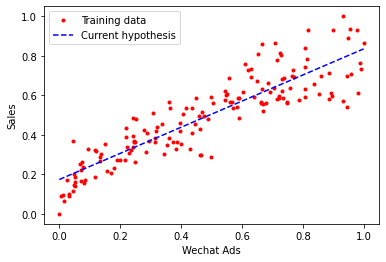

In [20]:
# 绘制当前的函数模型
plt.plot(X_train, y_train,'r.', label='Training data') # 显示训练集散点图
line_X = np.linspace(X_train.min(), X_train.max(), 500) # X值域
# 关于weight_history[-1],这里的索引[-1]，我们讲过，就代表迭代500次后的最后一个W值
line_y = [weight_history[-1]*xx + bias_history[-1] for xx in line_X] # 假设函数y_hat
plt.plot(line_X,line_y,'b--', label='Current hypothesis' ) # 显示当前拟合函数
plt.xlabel('Wechat Ads') # x轴Label
plt.ylabel('Sales') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图

## 调式迭代次数 ##
对迭代次数进行调试的主要目的是确定损失值已经收敛了，因为收敛了之后再继续迭代下去，损失值的变化基本上就微乎其微了。
确定损失值是否已经收敛的主要方法是观察不同迭代次数下形成的损失曲线。

就刚才我们所说的，如果设定了学习速率是0.5的话，那么迭代个100~200次就差不多了。

下面的代码是输出了α=0.5的时候迭代200次的时候的损失值，以及次数w和b的值。

这里各位所看到的索引[-1]，是相对索引代表了迭代200次之后的最后一次wb的值。
这两个值就是机器学习基于训练数据集得来的结果。

In [21]:
print ('当前损失：',cost_function(X_train, y_train, weight_history[-1], bias_history[-1]))
print ('当前权重：',weight_history[-1])
print ('当前偏置：',bias_history[-1])

当前损失： 0.009312952135151986
当前权重： 0.6608381748731955
当前偏置： 0.17402747570052432


## 这里是在测试集上进行预测 ##
在迭代200次之后，我们可能认为当前机器学习已经给出了比较好的结果。对于训练集的均方误差函数的损失值已经非常小了，基本上接近于0，那么，是不是在测试集上，这个函数是不是也一样好使呢？
下面的代码输出一下在测试集上的结果

In [22]:
print ('测试集损失：',cost_function(X_test, y_test, weight_history[-1], bias_history[-1]))

测试集损失： 0.009068113079114393


我们在这里看到上面的运行结果，可能发现，比之前训练集的结果还要好。
测试集的损失比训练集的损失还要低，这种情况并不是我们看到的常态，但是在比较小的数据集上是有可能出现的，我们还可以同时去描绘出训练集和测试集随着迭代次数而形成的损失曲线。

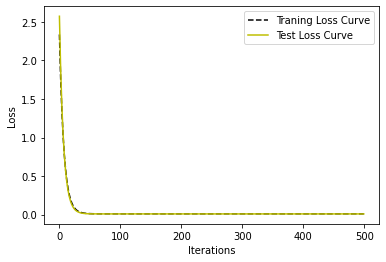

In [23]:
# 同时绘制训练集和测试集损失曲线
loss_test ,a , b = gradient_descent(X_test, y_test, weight, bias, alpha, iterations)
plt.plot(loss_history,'k--',label='Traning Loss Curve')
plt.plot(loss_test,'y',label='Test Loss Curve')
plt.xlabel('Iterations') # x轴Label
plt.ylabel('Loss') # y轴Label
plt.legend() # 显示图例
plt.show()

In [24]:
# 设计Contour Plot动画
import matplotlib.animation as animation

theta0_vals = np.linspace(-2, 3, 100)
theta1_vals = np.linspace(-3, 3, 100)
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))
        weight = element
        bias = element2
        J_vals[t1, t2] = cost_function(X_train, y_train, weight, bias)

J_vals = J_vals.T
A, B = np.meshgrid(theta0_vals, theta1_vals)
C = J_vals

fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(X_train,y_train,'ro', label='Training data')
plt.title('Sales Prediction')
plt.axis([X_train.min()-X_train.std(),X_train.max()+X_train.std(),y_train.min()-y_train.std(),y_train.max()+y_train.std()])
plt.grid(axis='both')
plt.xlabel("WeChat Ads Volumn (X1) ")
plt.ylabel("Sales Volumn (Y)")
plt.legend(loc='lower right')
line, = plt.plot([], [], 'b-', label='Current Hypothesis')
annotation = plt.text(-2, 3,'',fontsize=20,color='green')
annotation.set_animated(True)

plt.subplot(122)
cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('Bias')
plt.ylabel('Weight')
track, = plt.plot([], [], 'r-')
point, = plt.plot([], [], 'ro')

plt.tight_layout()
plt.close()

def init():
    line.set_data([], [])
    track.set_data([], [])
    point.set_data([], [])
    annotation.set_text('')
    return line, track, point, annotation

def animate(i):
    fit1_X = np.linspace(X_train.min()-X_train.std(), X_train.max()+X_train.std(), 1000)
    fit1_y = bias_history[i] + weight_history[i]*fit1_X
    
    fit2_X = bias_history.T[:i]
    fit2_y = weight_history.T[:i]
    
    track.set_data(fit2_X, fit2_y)
    line.set_data(fit1_X, fit1_y)
    point.set_data(bias_history.T[i], weight_history.T[i])
    
    annotation.set_text('Cost = %.4f' %(loss_history[i]))
    return line, track, point, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 500)

MovieWriter imagemagick unavailable; using Pillow instead.



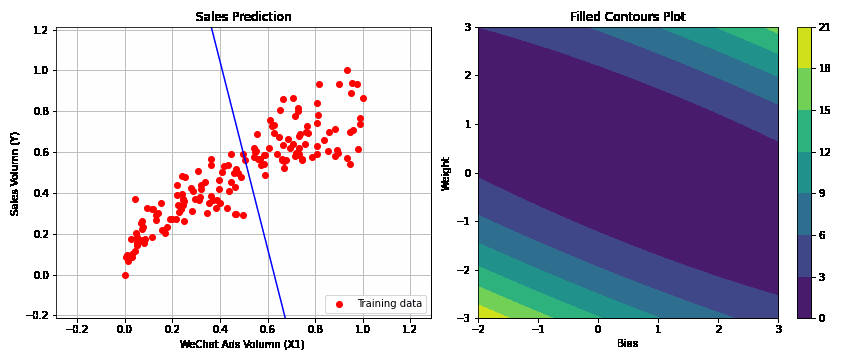

In [25]:
# 显示Contour Plot动画
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''< img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))